### Linear Regression & Scikit-Learn Intro

This lab is designed to give everyone their first introduction to the Scikit-Learn API, and Linear Regression, one of the most commonly used techniques in predictive modeling.

During this lab you'll see if you can build a model, understand its working parts, and make improvements to your results!  

The great thing about `Scikit Learn` is that its API is almost identical from one algorithm to another, so once you get the hang of how to use it, using different methods is fairly seamless.

**Step 1:** Load in the `housing.csv` file

In [1]:
# your answer here
import numpy as np
import pandas as pd
df = pd.read_csv('../../data/housing.csv')

**Step 2:** What columns to include?  This is a bit of a topic unto itself, but for now let's keep it fairly simple, and choose the 5 columns that have the highest correlation (in magnitude) to the `PRICE` column. 

**hint:** `df.corr()`, and/or `sns.heatmap()` are helpful here.

In [7]:
# your answer here
np.abs(df.corr()['PRICE']).sort_values(ascending=False)[1:6]

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
Name: PRICE, dtype: float64

**Step 3:** Declare your `X` & `y` variables

In [8]:
# your answer here
X = df[['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']]
y = df['PRICE']

**Step 4:** Import `LinearRegression` and initialize it.

In [9]:
# your answer here
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

**Step 5:** Call the `fit()` method on `X` & `y`

In [10]:
# your answer here
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Step 6:** Look at the values for `lreg.coef_` & `lreg.intercept_`

In [11]:
# your answer here
lreg.coef_

array([-5.59004744e-01,  4.62516926e+00, -8.76154330e-01,  5.69752124e-02,
       -3.53693090e-03])

In [12]:
lreg.intercept_

17.51771284955599

**Step 7:** Turn your model output into a more readable format.  

Try using the following:

  `coeff_dict = {'Column': X.columns, 'Weight': lreg.coef_}`
  
  `coeff = pd.DataFrame(coeff_dict)`

In [13]:
# your answer here
coeff_dict = {'Column': X.columns, 'Weight': lreg.coef_}
coeffs     = pd.DataFrame(coeff_dict)
coeffs.sort_values(by='Weight', ascending=False)

,Column,Weight
1,RM,4.625169
3,INDUS,0.056975
4,TAX,-0.003537
0,LSTAT,-0.559005
2,PTRATIO,-0.876154


**Step 8:** Using the table you created in the previous step, what column had the largest coefficient (in magnitude)?

Does this mean it has the most predictive value of any column in your dataset? (We'll discuss this in class).

In [15]:
# your answer here
coeffs.sort_values(by='Weight', ascending=False).head(1)

,Column,Weight
1,RM,4.625169


**Step 9:** What is your model's score? (We haven't really talked about what this means yet.  Don't worry, we'll get to that).

In [16]:
# your answer here
lreg.score(X, y)

0.6804097741290724

**Step 10:** What is the equation of your model?

Ie, `y = coefval1 * RM + coefval2 * TAX + coefval3 * SomeColumnName + intercept`

$$ y = 4.62*RM + .06*INDUS - 0.003*TAX -.56*LSTAT - .88*PTRATIO + 17.52 $$

**Step 11:** Make a column in your dataframe called `PREDICTION`, and make it the predicted values of each row in `X`.

In [18]:
# your answer here
df['PREDICTION'] = lreg.predict(X)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTION
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.823877
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,26.057952
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,32.448095
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.196095
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,30.549224


**Step 12:** Looking at your first observation, can you make sense of the predicted value?  Ie, how it was generated from your coefficients & intercept?  Could you recreate it on your own?

In [19]:
# this multiplies each column in x by its intercept
cols_times_coefs = X[:1] * lreg.coef_
# this adds them together -- going across the row
sum_of_cols = np.sum(cols_times_coefs, axis=1)
# and finally we add in the intercept
prediction = sum_of_cols + lreg.intercept_

In [22]:
# and if we wanted, we can double check that this matches the first row
print(prediction, df['PREDICTION'][:1])

0    30.823877
dtype: float64 0    30.823877
Name: PREDICTION, dtype: float64


#### Bonus

If you've made it this far, good job.  You can congratulate yourself for having duly completed the meat of today's lesson.  However, there are more details to discuss with these things, and these questions will give you a head's up on future points of attention.

**Bonus 1:** Data Scaling

The literal meaning of a coefficient is it's the expected change in `y` you would get by increasing its associated column's value by exactly 1.  

What's problematic about this definition is that most of the time data exists on different scales, making the meaning of your coefficients less clear.  

For example, the `TAX` column has a range of 200-800, and the `NOX` column has a range of 0.3-0.8.  Increasing the values in these columns by 1 will necessarily mean very different things since their scales are so different.  
To get around this, you typically scale your data before feeding it to a Linear Regression model (or anything else that uses coefficients). 

You accomplish this by taking every column and subtracting its mean from every value, and then dividing each value in a column by its standard deviation.  

You can do it like this:

`X = X - X.mean()`

`X = X / X.std()`

**a). Standardize Your Data, And Use the `Describe()` method to verify your results**

In [23]:
# your answer here
X = X - X.mean()
X = X / X.std()
# and now we double check -- the e-16 means there are 16 zero's before you
# get to the first number
X.describe()

,LSTAT,RM,PTRATIO,INDUS,TAX
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-6.494585e-16,-1.256209e-14,-9.409250e-15,-3.138958e-15,6.244456e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.529613e+00,-3.876413e+00,-2.704703e+00,-1.556302e+00,-1.312691e+00
25%,-7.986296e-01,-5.680681e-01,-4.875567e-01,-8.668328e-01,-7.668172e-01
50%,-1.810744e-01,-1.083583e-01,2.745872e-01,-2.108898e-01,-4.642132e-01
75%,6.024226e-01,4.822906e-01,8.057784e-01,1.014995e+00,1.529413e+00
max,3.545262e+00,3.551530e+00,1.637208e+00,2.420170e+00,1.796416e+00


**b). Refit your model on `X` and `y`, and look at your new coefficients.  Are they they the same or different?**

In [24]:
# your answer here
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# they look to be different
lreg.coef_

array([-3.99188726,  3.24972322, -1.8968264 ,  0.39087007, -0.59610413])

In [26]:
# if we wanted something in a cleaner format, we could try this
coeff_dict = {'Column': X.columns, 'Coefficient': lreg.coef_}
coeffs = pd.DataFrame(coeff_dict).sort_values(by='Coefficient', ascending=False)
coeffs

,Column,Coefficient
1,RM,3.249723
3,INDUS,0.390870
4,TAX,-0.596104
2,PTRATIO,-1.896826
0,LSTAT,-3.991887


**c).  Look at your score.  Is it different?**

In [27]:
# and the score is the same
lreg.score(X, y)

0.6804097741290724

**d). What about your predictions?**

In [28]:
# your answer here
df['PREDICTION2'] = lreg.predict(X)

In [29]:
# and they are exactly the same
df[['PREDICTION', 'PREDICTION2']].head(10)

,PREDICTION,PREDICTION2
0,30.823877,30.823877
1,26.057952,26.057952
2,32.448095,32.448095
3,31.196095,31.196095
4,30.549224,30.549224
5,27.300058,27.300058
6,24.406665,24.406665
7,21.390180,21.390180
8,12.861893,12.861893
9,21.759112,21.759112


**Bonus II: Basis Expansion**

The most common problem with Linear Regression models is that data is not always so linear.  Sometimes there are increasing returns to scale, diminishing returns, outliers, or erratic jump points that make your results untrustworthy.  

One common way to get around this is something called **basis expansion**, which is simply finding ways to capture irregular patterns in your data via different types of numeric transformations.  

In fact, lots of cutting edge techniques can be accurately framed as basis expansions on linear models.  

In this section, we'll see if we can find some low-hanging fruit in the columns that we currently have to perhaps better handle not-so-linear patterns. 

Here are some things you can try:

 - If the relationship between two columns looks like it's exponentially increasing or parabolic (bowl shaped), you can try raising the numbers in that column to a higher power.  Ie, `df[col]**2 or df[col]**3`, etc.
 - If it looks like you are hitting diminishing returns you can try taking the square-root of a column and adding that to your mix of predictors
 - If a column looks like it's plagued by irregular values then you can use a log transformation `(np.log(df[col]))` to make it more numerically stable
 - If you think two columns (or more) have a multiplicative effect then you can try creating a new column that's the product of those columns multiplied together and use that in your regression.  These are called *interaction effects*.  Ie, do things like `CRIM` and `LSTAT` (socioeconomic status) reinforce one another?  If so, multiplying them together can capture their joint impact.
 
You could potentially do any of these to any columns in `X` or `y`.

With that said, try using either the `pairplot`, `histogram` or `regplot` in seaborn to see if there's perhaps a higher order relationship to be captured.  If you see something that looks intriguing, add a new column to `X` that captures this relationship, re-run your regression, and see if your model score improved.

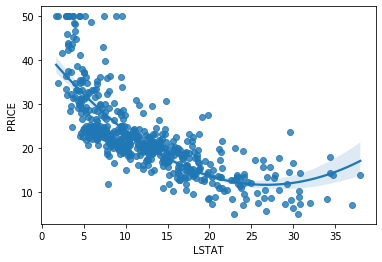

In [32]:
# option 1: the LSTAT column
import seaborn as sns
# the order argument finds the line of best fit for LSTAT^2
sns.regplot(x='LSTAT', y='PRICE', order=2, data=df);

In [33]:
# so we'll go ahead and square this
X['LSTAT2'] = X['LSTAT']**2
# and fit it
lreg.fit(X, y)
# and score -- and it helped
lreg.score(X, y)

0.7312712324177983

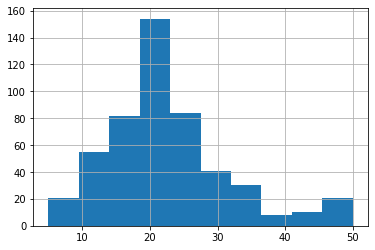

In [34]:
# another good target here is y itself -- look at its histograms -- notice the right tail?
y.hist();

In [35]:
# log transform it, refit, and score
y = np.log(y)
lreg.fit(X, y)
# a modest improvement
lreg.score(X, y)

0.7383085628348067

**Bonus III: Regularized Regression**

Many times you'll have a dataset that has many columns that are highly correlated, or just of dubious quality and you're better off excluding them from your model.  

In these circumstances, it can be difficult to get reliable results that replicate well to out-of-sample data, or reason about what to even include for your model.

Two common variants of common Linear Regression which help with these issues are **Ridge Regression** and **Lasso Regression**.  

They serve the same general purpose of reducing the impact of multicollinearity (highly correlated columns) and/or removal of low quality columns.  However, how they go about doing so is slightly different.

For now, let's just see how they work.

**Run the following cell to import Ridge and Lasso Regression**

In [36]:
# import the models here
from sklearn.linear_model import Ridge, Lasso

**Initialize instances of both, and fit them on your data.**

In [40]:
# your answer here
ridge = Ridge()
lasso = Lasso()
ridge.fit(X, y)
lasso.fit(X, y)
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Look at the values of your coefficients.  How are they different from regular Linear Regression?**

In [38]:
# your answer here
ridge.coef_

array([-0.28039631,  0.07207532, -0.05983077,  0.03530754, -0.0672029 ,
        0.03737758])

In [39]:
lasso.coef_

array([-0.,  0., -0., -0., -0., -0.])

In [41]:
lreg.coef_

array([-0.28216032,  0.071645  , -0.05974446,  0.03618919, -0.06736517,
        0.03789625])

If you look at the parameters of each one, you'll notice they have something called `alpha`.  This is a value that can go as low as 0 and has no upper limit.  

**Try changing the values of alpha for both Ridge and Lasso by multiples of 10, and notice what impact it has on your coefficients. (You can try values that are less than 1.  This is especially useful for Lasso, which is more sensitive to alpha than Ridge, ie .1, .01, .001, for alpha).**

In [44]:
# we'll start with ridge first
ridgedf = pd.DataFrame(index=X.columns)
ridge.alpha = 10
# and fit
ridge.fit(X, y)
ridgedf['alpha10']   = ridge.coef_
# and do this a few more times
ridge.alpha = 100
ridge.fit(X, y)
ridgedf['alpha100']  = ridge.coef_
ridge.alpha = 1000
ridge.fit(X, y)
ridgedf['alpha1000'] = ridge.coef_

In [47]:
# our coefficients for each value of alpha
ridgedf

,alpha10,alpha100,alpha1000
LSTAT,-0.265787,-0.185764,-0.073183
RM,0.075488,0.087097,0.055741
PTRATIO,-0.060507,-0.062103,-0.041689
INDUS,0.028038,-0.009811,-0.034696
TAX,-0.065870,-0.058924,-0.040935
LSTAT2,0.033070,0.009031,-0.019866


In [48]:
# and another way to look at them -- their total magnitude gets smaller
# as alpha grows
np.abs(ridgedf).sum()

alpha10      0.528760
alpha100     0.412730
alpha1000    0.266111
dtype: float64

In [51]:
# and we'll do the same for lasso as well -- but with smaller values for alpha
# we'll start with ridge first
lassodf = pd.DataFrame(index=X.columns)
lasso.alpha = .001
# and fit
lasso.fit(X, y)
lassodf['lasso001']   = lasso.coef_
# and do this a few more times
lasso.alpha = .01
lasso.fit(X, y)
lassodf['lasso01']  = lasso.coef_
lasso.alpha = .1
lasso.fit(X, y)
lassodf['lasso1'] = lasso.coef_

In [52]:
# our coefficients -- they get smaller
lassodf

,lasso001,lasso01,lasso1
LSTAT,-0.278852,-0.254174,-0.205964
RM,0.071160,0.067520,0.024746
PTRATIO,-0.059556,-0.057670,-0.018319
INDUS,0.031120,0.000000,-0.000000
TAX,-0.064201,-0.043712,-0.001593
LSTAT2,0.036411,0.024269,-0.000000


In [53]:
# and we can see it this way too
np.abs(lassodf).sum()

lasso001    0.541300
lasso01     0.447345
lasso1      0.250621
dtype: float64